LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READ THE DATASET

In [2]:
df = pd.read_csv(r"C:\Users\Neelay\Downloads\Neelay\GitHub Projects\Business Analysis\Market Basket Analysis\python-groceries\groceries - groceries.csv")
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BASIC DATASET ATTRIBUTES

In [3]:
df.shape

(9835, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [5]:
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


BASIC ANALYSIS OF THE SIZE OF THE BASKET

In [6]:
order_count = df['Item(s)'].count()
order_max = df['Item(s)'].max()
order_min = df['Item(s)'].min()
order_mean = df['Item(s)'].mean()
order_median = df['Item(s)'].median()
order_mode = df['Item(s)'].mode()

print("Basic basket size infromation:-\n\nCount:  ", order_count, "\nMax:    ", order_max, "\nMin:    ", order_min, "\nMean:   ", order_mean, "\nMedian: ", order_median, "\nMode:   ", order_mode)

Basic basket size infromation:-

Count:   9835 
Max:     32 
Min:     1 
Mean:    4.409456024402644 
Median:  3.0 
Mode:    0    1
Name: Item(s), dtype: int64


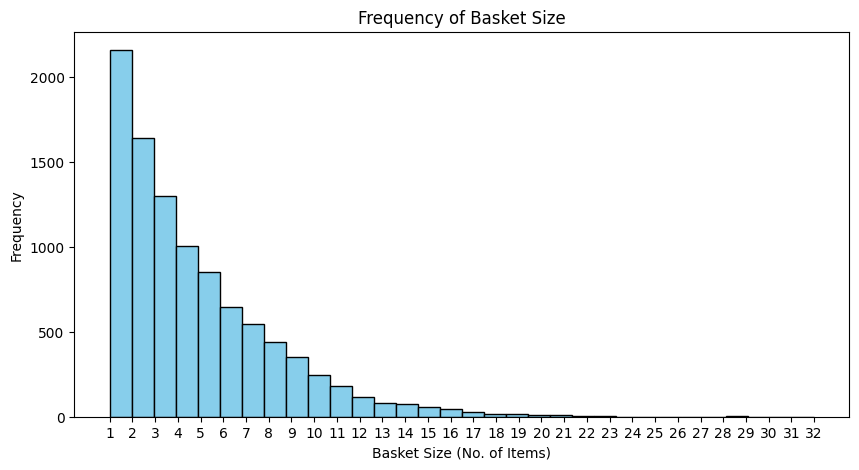

In [7]:
#HISTOGRAM: FREQUENCY OF BASKET SIZES

plt.figure(figsize=(10,5))
plt.hist(df['Item(s)'], bins=32, color='skyblue', edgecolor='black')

plt.xlabel('Basket Size (No. of Items)')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 33, step = 1))
plt.title('Frequency of Basket Size')

plt.show()

BASIC ANALYSIS OF THE ORDERED ITEMS

In [8]:
unique_items = pd.unique(df.drop("Item(s)", axis = 1).values.flatten())
print("Total number of unique items ordered: ", unique_items.size-1,)

Total number of unique items ordered:  169


In [9]:
print("Frequency of Items ordered in descending order: ")
items_list = df.drop("Item(s)", axis = 1).apply(pd.value_counts).sum(axis = 1).sort_values(ascending = False)
items_list

Frequency of Items ordered in descending order: 


whole milk               2513.0
other vegetables         1903.0
rolls/buns               1809.0
soda                     1715.0
yogurt                   1372.0
                          ...  
bags                        4.0
kitchen utensil             4.0
preservation products       2.0
baby food                   1.0
sound storage medium        1.0
Length: 169, dtype: float64

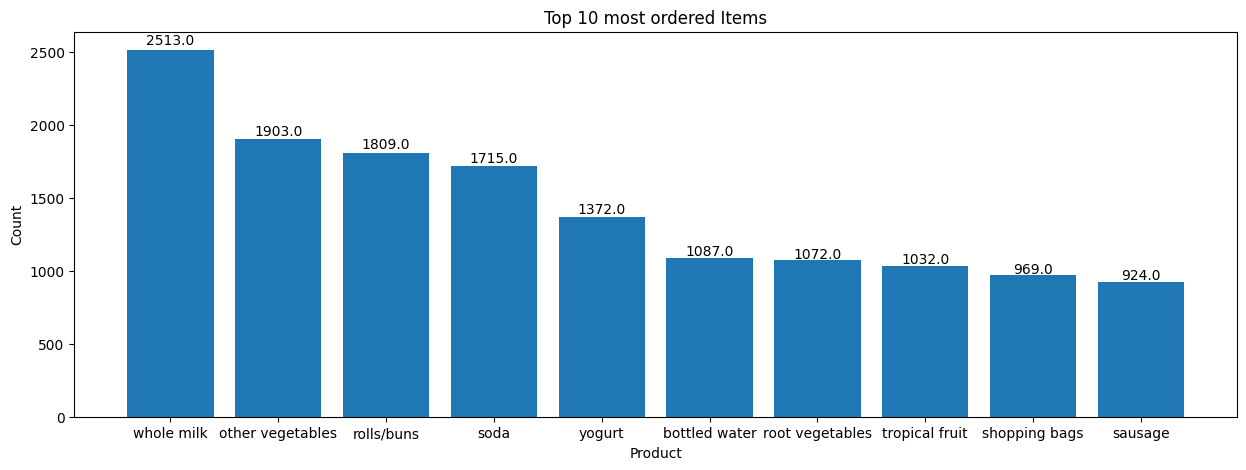

In [10]:
#BAR CHART: TOP 10 MOST ORDERED ITEMS

top10items = items_list.head(10)

plt.figure(figsize=(15,5))
plt.bar(top10items.index, top10items.values)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1.015,y[i], ha = "center")
addlabels(top10items.index, top10items.values)

plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(np.arange(0, 10, step = 1))
plt.title('Top 10 most ordered Items')

plt.show()

1. USING MLXTEND APRIORI ALGORITHM

In [11]:
#CONVERT ALL NA TO False
df_no_nan = df.drop("Item(s)", axis = 1).fillna(False)
df_no_nan.head(3)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tropical fruit,yogurt,coffee,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,whole milk,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#CREATING A HOT ENCODED DATAFRAME

#new column names using item names
columns_array = np.array([item for item in unique_items if not pd.isna(item)])

#new row names using previous column names
rows_array = np.array(df_no_nan.columns)

#create empty dataframe
df_temp = pd.DataFrame(index=range(169), columns=range(32))

#index and column names
df_temp_new = pd.DataFrame(df_temp, columns = rows_array)
df_temp_new.index = columns_array

#encoding by 0/1 to each location
for i in columns_array:
    for j in rows_array:
        count = 0
        for k in df_no_nan[j]:
            if k == i:
                count = True
        df_temp_new.loc[i,j] = count

df_temp_new


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
citrus fruit,True,True,True,True,True,True,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
semi-finished bread,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
margarine,True,True,True,True,True,True,True,True,True,True,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0
ready soups,0,0,True,True,True,True,True,True,0,True,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
tropical fruit,True,True,True,True,True,True,0,True,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bags,True,0,0,0,0,0,True,True,0,0,...,0,0,0,0,0,0,0,0,0,0
cooking chocolate,True,0,True,True,True,True,0,True,True,True,...,0,0,0,0,0,0,True,0,0,0
sound storage medium,0,0,0,0,0,0,0,0,True,0,...,0,0,0,0,0,0,0,0,0,0
kitchen utensil,True,0,0,0,0,0,0,0,True,0,...,0,0,0,0,0,0,0,0,0,0


Libraries

In [13]:
from mlxtend.frequent_patterns import apriori as mlap, association_rules as mlar

Code

In [14]:
df_for_analysis = df_temp_new.T
frequent_itemsets = mlap(df_for_analysis, min_support = 0.57, use_colnames = True, ).sort_values(by = 'support', ascending = 0)
frequent_itemsets

c:\Users\Neelay\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
16,0.8125,(hygiene articles)
6,0.78125,(chocolate)
115,0.71875,"(hygiene articles, chocolate)"
2,0.71875,(long life bakery product)
8,0.71875,(fruit/vegetable juice)
...,...,...
2534,0.59375,"(detergent, bottled beer, potted plants, shopp..."
2533,0.59375,"(detergent, bottled beer, potted plants, candy..."
2532,0.59375,"(detergent, bottled beer, potted plants, waffl..."
2531,0.59375,"(bottled beer, potted plants, fruit/vegetable ..."


In [15]:
my_rules = mlar(frequent_itemsets, metric = "support", min_threshold = 0.57)
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(hygiene articles),(chocolate),0.81250,0.78125,0.71875,0.884615,1.132308,0.083984,1.895833,0.623188
1,(chocolate),(hygiene articles),0.78125,0.81250,0.71875,0.920000,1.132308,0.083984,2.343750,0.534161
2,(chocolate),(long life bakery product),0.78125,0.71875,0.71875,0.920000,1.280000,0.157227,3.515625,1.000000
3,(long life bakery product),(chocolate),0.71875,0.78125,0.71875,1.000000,1.280000,0.157227,inf,0.777778
4,(chocolate),(napkins),0.78125,0.71875,0.68750,0.880000,1.224348,0.125977,2.343750,0.837662
...,...,...,...,...,...,...,...,...,...,...
521107,(bottled water),"(chocolate, detergent, potted plants, candy, s...",0.62500,0.59375,0.59375,0.950000,1.600000,0.222656,8.125000,1.000000
521108,(chocolate marshmallow),"(chocolate, detergent, potted plants, candy, s...",0.62500,0.59375,0.59375,0.950000,1.600000,0.222656,8.125000,1.000000
521109,(hygiene articles),"(chocolate, detergent, potted plants, candy, s...",0.81250,0.59375,0.59375,0.730769,1.230769,0.111328,1.508929,1.000000
521110,(newspapers),"(chocolate, detergent, potted plants, candy, s...",0.68750,0.59375,0.59375,0.863636,1.454545,0.185547,2.979167,1.000000


In [38]:
#STEPS FOR THE FINAL RECOMMENDATION SET

#The recommendations pop-up after choosing 1 item, hence antecedents = 1
recommendation_set1 = my_rules[my_rules['antecedents'].apply(lambda x: len(x) == 1)].sort_values(by = 'lift', ascending = 0)

#Also, more than 3 recommendations will be too overwhelming for the customer, hence consequents <= 3
recommendation_set2 = recommendation_set1[recommendation_set1['consequents'].apply(lambda x: len(x) <= 3)].sort_values(by = 'lift', ascending = 0)

#Final recommendation set:-
col_temp = ['antecedents', 'consequents']
enhanced_recset = recommendation_set2[col_temp].drop_duplicates()
enhanced_recset.head(10).style.hide_index()

C:\Users\Neelay\AppData\Local\Temp\ipykernel_9948\3702139637.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  enhanced_recset.head(10).style.hide_index()


antecedents,consequents
frozenset({'kitchen towels'}),"frozenset({'candy', 'specialty chocolate'})"
frozenset({'specialty chocolate'}),"frozenset({'candy', 'soda', 'fruit/vegetable juice'})"
frozenset({'specialty bar'}),"frozenset({'long life bakery product', 'napkins', 'salty snack'})"
frozenset({'specialty bar'}),"frozenset({'hygiene articles', 'long life bakery product', 'salty snack'})"
frozenset({'kitchen towels'}),"frozenset({'soda', 'newspapers', 'fruit/vegetable juice'})"
frozenset({'specialty chocolate'}),"frozenset({'hygiene articles', 'kitchen towels', 'soda'})"
frozenset({'specialty chocolate'}),"frozenset({'kitchen towels', 'fruit/vegetable juice'})"
frozenset({'kitchen towels'}),"frozenset({'candy', 'soda', 'fruit/vegetable juice'})"
frozenset({'specialty bar'}),"frozenset({'long life bakery product', 'shopping bags', 'salty snack'})"
frozenset({'specialty chocolate'}),"frozenset({'hygiene articles', 'soda', 'napkins'})"


2. USING MLXTEND FP GROWTH ALGORITHM

Libraries

In [19]:
from mlxtend.frequent_patterns import fpgrowth

In [24]:
#HOT ENCODED DATAFRAME

df_for_analysis

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
Item 1,True,True,True,0,True,True,True,True,True,True,...,0,0,True,True,True,True,True,0,True,0
Item 2,True,True,True,0,True,True,True,True,True,True,...,0,0,True,0,0,0,0,0,0,0
Item 3,True,True,True,True,True,True,True,True,True,True,...,0,True,True,True,True,0,True,0,0,0
Item 4,True,True,True,True,True,True,True,True,True,True,...,0,True,True,0,True,0,True,0,0,0
Item 5,True,True,True,True,True,True,True,True,True,True,...,0,True,True,0,True,0,True,0,0,0
Item 6,True,True,True,True,True,True,True,True,True,True,...,0,True,True,True,0,0,True,0,0,True
Item 7,True,True,True,True,0,True,True,True,True,True,...,0,True,0,True,True,True,0,0,0,0
Item 8,0.0,True,True,True,True,True,True,True,0,True,...,0,True,True,True,True,True,True,0,0,0
Item 9,0.0,True,True,0,0,True,True,True,0,True,...,0,True,True,0,0,0,True,True,True,0
Item 10,0.0,True,True,True,0,True,True,True,0,True,...,0,0,0,0,0,0,True,0,0,0


Code

In [35]:
#applying fpgrowth to df_new_analysis
frequent_itemsets2 = fpgrowth(df_for_analysis, min_support=0.6, use_colnames = True)
frequent_itemsets2

c:\Users\Neelay\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.81250,(hygiene articles)
1,0.78125,(chocolate)
2,0.71875,(long life bakery product)
3,0.71875,(napkins)
4,0.71875,(fruit/vegetable juice)
...,...,...
432,0.62500,"(chocolate, detergent, potted plants, candy, s..."
433,0.62500,"(chocolate, detergent, candy, shopping bags, h..."
434,0.62500,"(chocolate, detergent, potted plants, shopping..."
435,0.62500,"(chocolate, detergent, potted plants, candy, h..."


In [40]:
my_rules2 = mlar(frequent_itemsets2, metric = "support", min_threshold = 0.6).sort_values(by = 'lift', ascending = 0)
my_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3958,"(candy, shopping bags)","(detergent, newspapers)",0.62500,0.62500,0.62500,1.000000,1.600000,0.234375,inf,1.000000
3944,"(candy, potted plants)","(detergent, shopping bags)",0.62500,0.62500,0.62500,1.000000,1.600000,0.234375,inf,1.000000
3946,"(detergent, potted plants)","(candy, shopping bags)",0.62500,0.62500,0.62500,1.000000,1.600000,0.234375,inf,1.000000
3947,"(shopping bags, potted plants)","(candy, detergent)",0.62500,0.62500,0.62500,1.000000,1.600000,0.234375,inf,1.000000
3949,(detergent),"(candy, shopping bags, potted plants)",0.62500,0.62500,0.62500,1.000000,1.600000,0.234375,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
4,(hygiene articles),(long life bakery product),0.81250,0.71875,0.65625,0.807692,1.123746,0.072266,1.462500,0.587302
55,(fruit/vegetable juice),(hygiene articles),0.71875,0.81250,0.65625,0.913043,1.123746,0.072266,2.156250,0.391534
9,(hygiene articles),"(chocolate, long life bakery product)",0.81250,0.71875,0.65625,0.807692,1.123746,0.072266,1.462500,0.587302
326,(hygiene articles),(waffles),0.81250,0.68750,0.62500,0.769231,1.118881,0.066406,1.354167,0.566667


In [41]:
#STEPS FOR THE FINAL RECOMMENDATION SET

#The recommendations pop-up after choosing 1 item, hence antecedents = 1
recommendation_set_1 = my_rules2[my_rules2['antecedents'].apply(lambda x: len(x) == 1)].sort_values(by = 'lift', ascending = 0)

#Also, more than 3 recommendations will be too overwhelming for the customer, hence consequents <= 3
recommendation_set_2 = recommendation_set_1[recommendation_set_1['consequents'].apply(lambda x: len(x) <= 3)].sort_values(by = 'lift', ascending = 0)

#Final recommendation set:-
col_temp = ['antecedents', 'consequents']
enhanced_recset = recommendation_set_2[col_temp].drop_duplicates()
enhanced_recset.head(10).style.hide_index()

C:\Users\Neelay\AppData\Local\Temp\ipykernel_9948\2049398000.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  enhanced_recset.head(10).style.hide_index()


antecedents,consequents
frozenset({'detergent'}),"frozenset({'candy', 'shopping bags', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'chocolate', 'newspapers', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'candy', 'shopping bags', 'napkins'})"
frozenset({'detergent'}),"frozenset({'hygiene articles', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'hygiene articles', 'napkins', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'chocolate', 'napkins', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'hygiene articles', 'newspapers', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'hygiene articles', 'chocolate', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'candy', 'napkins', 'potted plants'})"
frozenset({'detergent'}),"frozenset({'candy', 'shopping bags'})"
